Using generated sample image instead


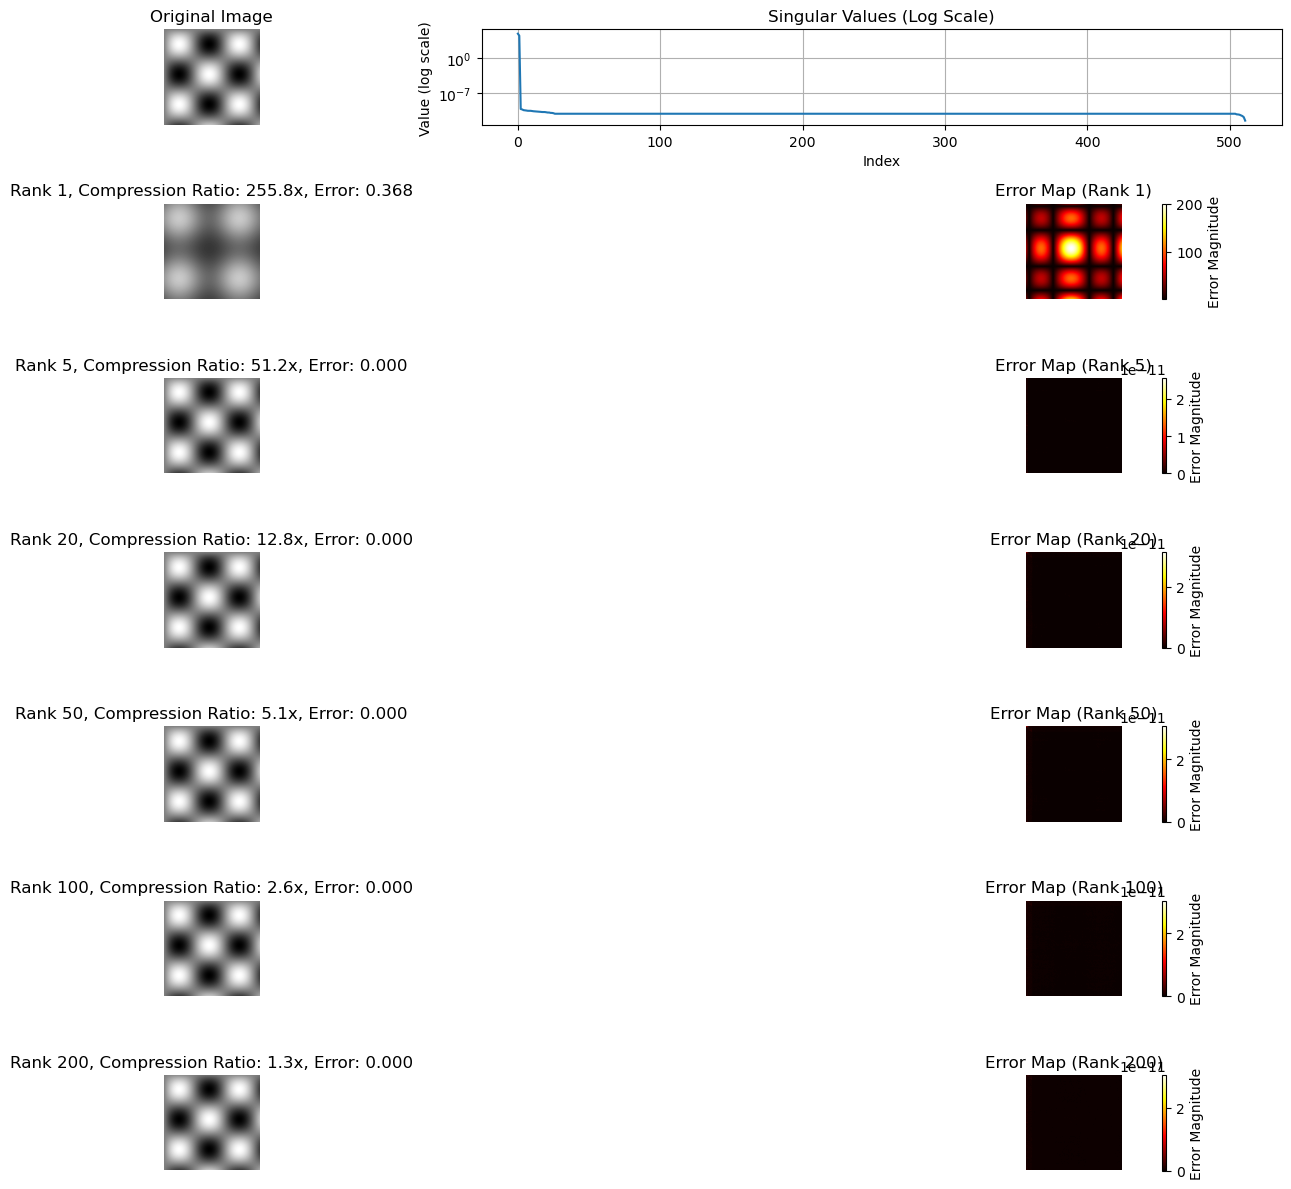


Information Retention by Rank:
Rank 1: 86.44% of information retained
Rank 5: 100.00% of information retained
Rank 20: 100.00% of information retained
Rank 50: 100.00% of information retained
Rank 100: 100.00% of information retained
Rank 200: 100.00% of information retained

Storage Requirements:
Original image: 2048.00 KB
Rank 1: 8.01 KB (255.8x compression)
Rank 5: 40.04 KB (51.2x compression)
Rank 20: 160.16 KB (12.8x compression)
Rank 50: 400.39 KB (5.1x compression)
Rank 100: 800.78 KB (2.6x compression)
Rank 200: 1601.56 KB (1.3x compression)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from io import BytesIO
from urllib.request import urlopen

# Function to download and process a sample image (grayscale)
def get_sample_image():
    # Using a placeholder image via a URL
    url = "https://upload.wikimedia.org/wikipedia/commons/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"
    try:
        img_data = urlopen(url).read()
        img = Image.open(BytesIO(img_data)).convert('L')  # Convert to grayscale
        return np.array(img)
    except:
        # If URL doesn't work, create a sample image
        print("Using generated sample image instead")
        x = np.linspace(0, 1, 512)
        y = np.linspace(0, 1, 512)
        X, Y = np.meshgrid(x, y)
        return 255 * (np.sin(X*10) * np.sin(Y*10) + 1) / 2

# Function to compress image using SVD with specified rank
def compress_image_svd(img, rank):
    # Apply SVD
    U, sigma, Vt = np.linalg.svd(img, full_matrices=False)
    
    # Keep only the specified rank
    U_compressed = U[:, :rank]
    sigma_compressed = sigma[:rank]
    Vt_compressed = Vt[:rank, :]
    
    # Reconstruct image with reduced rank
    img_compressed = U_compressed @ np.diag(sigma_compressed) @ Vt_compressed
    
    # Calculate compression ratio
    original_size = img.shape[0] * img.shape[1]
    compressed_size = rank * (img.shape[0] + img.shape[1] + 1)
    compression_ratio = original_size / compressed_size
    
    # Calculate error
    error = np.linalg.norm(img - img_compressed, 'fro') / np.linalg.norm(img, 'fro')
    
    return img_compressed, compression_ratio, error

# Get image
img = get_sample_image()

# Define ranks to demonstrate compression
ranks = [1, 5, 20, 50, 100, 200]

# Plot original and compressed images
plt.figure(figsize=(15, 12))

# Plot original image
plt.subplot(len(ranks) + 1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot singular values
plt.subplot(len(ranks) + 1, 2, 2)
U, sigma, Vt = np.linalg.svd(img, full_matrices=False)
plt.semilogy(sigma)
plt.title('Singular Values (Log Scale)')
plt.xlabel('Index')
plt.ylabel('Value (log scale)')
plt.grid(True)

# Plot compressed images for different ranks
for i, rank in enumerate(ranks):
    img_compressed, compression_ratio, error = compress_image_svd(img, rank)
    
    plt.subplot(len(ranks) + 1, 2, 2*i + 3)
    plt.imshow(img_compressed, cmap='gray')
    plt.clim(0, 255)  # Set color limits to match original image
    plt.title(f'Rank {rank}, Compression Ratio: {compression_ratio:.1f}x, Error: {error:.3f}')
    plt.axis('off')
    
    # Display the difference (error)
    plt.subplot(len(ranks) + 1, 2, 2*i + 4)
    difference = np.abs(img - img_compressed)
    plt.imshow(difference, cmap='hot')
    plt.colorbar(label='Error Magnitude')
    plt.title(f'Error Map (Rank {rank})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print information on how much information is preserved with each rank
U, sigma, Vt = np.linalg.svd(img, full_matrices=False)
total_variance = np.sum(sigma**2)

print("\nInformation Retention by Rank:")
print("============================")
for rank in ranks:
    variance_retained = np.sum(sigma[:rank]**2) / total_variance * 100
    print(f"Rank {rank}: {variance_retained:.2f}% of information retained")
    
# Calculate storage requirements
print("\nStorage Requirements:")
print("============================")
original_bytes = img.size * img.itemsize
print(f"Original image: {original_bytes / 1024:.2f} KB")

for rank in ranks:
    # Storage for U, sigma, and Vt components
    u_bytes = rank * img.shape[0] * img.itemsize  # U[:, :rank]
    s_bytes = rank * img.itemsize                 # sigma[:rank]
    v_bytes = rank * img.shape[1] * img.itemsize  # Vt[:rank, :]
    
    total_bytes = u_bytes + s_bytes + v_bytes
    print(f"Rank {rank}: {total_bytes / 1024:.2f} KB ({original_bytes / total_bytes:.1f}x compression)")



# Image Compression Using SVD

Singular Value Decomposition (SVD) provides an elegant mathematical approach to image compression. The code I've shared demonstrates this technique on a grayscale image.

## How SVD Image Compression Works

1. **Mathematical Foundation**: An image is treated as a matrix where each element represents a pixel intensity.

2. **Decomposition**: When we apply SVD to an image matrix A, we get:
   
   $$
   A = U × Σ × V^T
   $$
   

3. **Compression Mechanism**: 
   - We keep only the k largest singular values (where k is our target rank)
   - This gives us a low-rank approximation of the original image
   - The approximation minimizes the Frobenius norm of the error

4. **Storage Benefits**: Instead of storing m×n pixels, we store:
   - k columns of U: m×k values
   - k singular values: k values
   - k rows of V^T: k×n values
   - Total: k(m+n+1) values, which is much less than m×n when k is small

## Key Insights from the Example

- **Rapid Diminishing Returns**: The singular values decay quickly, meaning most of the image information is captured in the first few components
- **Visual Quality vs. Compression**: Lower ranks give higher compression but more visual degradation
- **Error Patterns**: The error visualization shows what details are lost at each compression level
- **Information Retention**: Even with just 50-100 components, you can often retain >90% of the image information

This technique is particularly effective for images with lots of smooth areas or redundant information. For real-world applications, JPEG and other specialized algorithms perform better, but SVD provides an elegant mathematical foundation for understanding image compression concepts.

Would you like me to explain any particular aspect of the SVD compression in more detail?